<a href="https://colab.research.google.com/github/zoropunk/zoropunk/blob/main/Project_House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

In [ ]:
# !unzip /content/house-prices-advanced-regression-techniques.zip

In [ ]:
#loading libraries

import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from scipy import stats
from scipy.stats import norm, skew


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [ ]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:


def missing_values(df):
    missing_count = df.isnull().sum()
    percent_missing = missing_count * 100 / len(df)
    values_available = len(df) - missing_count
    unique_values = df.nunique()

    missing_value_df = pd.DataFrame({
        'column_name': df.columns,
        'non_missing_count': values_available,
        'missing_count': missing_count,
        'percent_missing': percent_missing,
        'unique_values': unique_values
    })

    missing_value_df.sort_values('percent_missing', inplace=True, ascending=True)

    return missing_value_df



missing_values(train)

,column_name,non_missing_count,missing_count,percent_missing,unique_values
Id,Id,1460,0,0.000000,1460
TotalBsmtSF,TotalBsmtSF,1460,0,0.000000,721
Heating,Heating,1460,0,0.000000,6
SaleCondition,SaleCondition,1460,0,0.000000,6
CentralAir,CentralAir,1460,0,0.000000,2
...,...,...,...,...,...
MasVnrType,MasVnrType,588,872,59.726027,3
Fence,Fence,281,1179,80.753425,4
Alley,Alley,91,1369,93.767123,2
MiscFeature,MiscFeature,54,1406,96.301370,4


In [ ]:
missing_values(test)

,column_name,non_missing_count,missing_count,percent_missing,unique_values
Id,Id,1459,0,0.000000,1459
Foundation,Foundation,1459,0,0.000000,6
HeatingQC,HeatingQC,1459,0,0.000000,5
CentralAir,CentralAir,1459,0,0.000000,2
Electrical,Electrical,1459,0,0.000000,4
...,...,...,...,...,...
MasVnrType,MasVnrType,565,894,61.274846,3
Fence,Fence,290,1169,80.123372,4
Alley,Alley,107,1352,92.666210,2
MiscFeature,MiscFeature,51,1408,96.504455,3


In [ ]:
print(f' There are {train.shape[0]} rows and {train.shape[1] } columns in training')
print(f' There are {test.shape[0]} rows and {test.shape[1] } columns in test')

 There are 1460 rows and 81 columns in training
 There are 1459 rows and 80 columns in test


In [ ]:
print(f' Columns are : {train.columns}')

 Columns are : Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCon

Here is the explanation of the columns in HTML table format:

```html
<table border="1" cellpadding="5" cellspacing="0">
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Id</td>
      <td>Unique identifier for each property.</td>
    </tr>
    <tr>
      <td>SalePrice</td>
      <td>The target variable representing the property's sale price.</td>
    </tr>
    <tr>
      <td>MSSubClass</td>
      <td>The type of dwelling involved (e.g., 1-story, 2-story).</td>
    </tr>
    <tr>
      <td>MSZoning</td>
      <td>The general zoning classification of the sale (e.g., residential, commercial).</td>
    </tr>
    <tr>
      <td>HouseStyle</td>
      <td>The style of the dwelling (e.g., 1-story, 2-story, split level).</td>
    </tr>
    <tr>
      <td>BldgType</td>
      <td>The type of building (e.g., single-family, townhouse).</td>
    </tr>
    <tr>
      <td>LotFrontage</td>
      <td>Linear feet of street connected to property.</td>
    </tr>
    <tr>
      <td>LotArea</td>
      <td>Lot size in square feet.</td>
    </tr>
    <tr>
      <td>Street</td>
      <td>Type of road access to property (e.g., paved, gravel).</td>
    </tr>
    <tr>
      <td>Alley</td>
      <td>Type of alley access to property (e.g., paved, gravel, none).</td>
    </tr>
    <tr>
      <td>LotShape</td>
      <td>General shape of property (e.g., regular, irregular).</td>
    </tr>
    <tr>
      <td>LandContour</td>
      <td>Flatness of the property (e.g., flat, gentle slope).</td>
    </tr>
    <tr>
      <td>Utilities</td>
      <td>Type of utilities available (e.g., all public, electricity, gas, water, and sewer).</td>
    </tr>
    <tr>
      <td>LotConfig</td>
      <td>Lot configuration (e.g., inside lot, corner lot).</td>
    </tr>
    <tr>
      <td>LandSlope</td>
      <td>Slope of property (e.g., gentle slope, moderate slope).</td>
    </tr>
    <tr>
      <td>Neighborhood</td>
      <td>Physical locations within Ames city limits.</td>
    </tr>
    <tr>
      <td>Condition1</td>
      <td>Proximity to various conditions (e.g., main road, railroad).</td>
    </tr>
    <tr>
      <td>Condition2</td>
      <td>Proximity to various conditions (if a second exists).</td>
    </tr>
    <tr>
      <td>OverallQual</td>
      <td>Overall material and finish quality.</td>
    </tr>
    <tr>
      <td>OverallCond</td>
      <td>Overall condition rating.</td>
    </tr>
    <tr>
      <td>YearBuilt</td>
      <td>Original construction date.</td>
    </tr>
    <tr>
      <td>YearRemodAdd</td>
      <td>Year of the most recent remodeling.</td>
    </tr>
    <tr>
      <td>RoofStyle</td>
      <td>Type of roof (e.g., gable, hip).</td>
    </tr>
    <tr>
      <td>RoofMatl</td>
      <td>Roof material (e.g., composite, metal).</td>
    </tr>
    <tr>
      <td>Exterior1st</td>
      <td>Exterior covering on the house.</td>
    </tr>
    <tr>
      <td>Exterior2nd</td>
      <td>Exterior covering on the house (if more than one material).</td>
    </tr>
    <tr>
      <td>MasVnrType</td>
      <td>Masonry veneer type (e.g., brick, stone).</td>
    </tr>
    <tr>
      <td>MasVnrArea</td>
      <td>Masonry veneer area in square feet.</td>
    </tr>
    <tr>
      <td>ExterQual</td>
      <td>Exterior material quality.</td>
    </tr>
    <tr>
      <td>ExterCond</td>
      <td>Present condition of the material on the exterior.</td>
    </tr>
    <tr>
      <td>Foundation</td>
      <td>Type of foundation (e.g., basement, crawl space, slab).</td>
    </tr>
    <tr>
      <td>BsmtQual</td>
      <td>Height of the basement.</td>
    </tr>
    <tr>
      <td>BsmtCond</td>
      <td>General condition of the basement.</td>
    </tr>
    <tr>
      <td>BsmtExposure</td>
      <td>Walkout or garden level basement walls.</td>
    </tr>
    <tr>
      <td>BsmtFinType1</td>
      <td>Quality of basement finished area.</td>
    </tr>
    <tr>
      <td>BsmtFinSF1</td>
      <td>Type 1 finished square feet.</td>
    </tr>
    <tr>
      <td>BsmtFinType2</td>
      <td>Quality of second finished area (if present).</td>
    </tr>
    <tr>
      <td>BsmtFinSF2</td>
      <td>Type 2 finished square feet.</td>
    </tr>
    <tr>
      <td>BsmtUnfSF</td>
      <td>Unfinished square feet of basement area.</td>
    </tr>
    <tr>
      <td>TotalBsmtSF</td>
      <td>Total square feet of basement area.</td>
    </tr>
    <tr>
      <td>Heating</td>
      <td>Type of heating system.</td>
    </tr>
    <tr>
      <td>HeatingQC</td>
      <td>Heating quality and condition.</td>
    </tr>
    <tr>
      <td>CentralAir</td>
      <td>Central air conditioning (Yes/No).</td>
    </tr>
    <tr>
      <td>Electrical</td>
      <td>Electrical system.</td>
    </tr>
    <tr>
      <td>1stFlrSF</td>
      <td>First-floor square feet.</td>
    </tr>
    <tr>
      <td>2ndFlrSF</td>
      <td>Second-floor square feet.</td>
    </tr>
    <tr>
      <td>LowQualFinSF</td>
      <td>Low-quality finished square feet (all floors).</td>
    </tr>
    <tr>
      <td>GrLivArea</td>
      <td>Above grade (ground) living area square feet.</td>
    </tr>
    <tr>
      <td>BsmtFullBath</td>
      <td>Basement full bathrooms.</td>
    </tr>
    <tr>
      <td>BsmtHalfBath</td>
      <td>Basement half bathrooms.</td>
    </tr>
    <tr>
      <td>FullBath</td>
      <td>Full bathrooms above grade.</td>
    </tr>
    <tr>
      <td>HalfBath</td>
      <td>Half bathrooms above grade.</td>
    </tr>
    <tr>
      <td>BedroomAbvGr</td>
      <td>Bedrooms above grade (does not include basement bedrooms).</td>
    </tr>
    <tr>
      <td>KitchenAbvGr</td>
      <td>Kitchens above grade.</td>
    </tr>
    <tr>
      <td>KitchenQual</td>
      <td>Kitchen quality.</td>
    </tr>
    <tr>
      <td>TotRmsAbvGrd</td>
      <td>Total rooms above grade (does not include bathrooms).</td>
    </tr>
    <tr>
      <td>Functional</td>
      <td>Home functionality rating.</td>
    </tr>
    <tr>
      <td>Fireplaces</td>
      <td>Number of fireplaces.</td>
    </tr>
    <tr>
      <td>FireplaceQu</td>
      <td>Fireplace quality.</td>
    </tr>
    <tr>
      <td>GarageType</td>
      <td>Garage location.</td>
    </tr>
    <tr>
      <td>GarageYrBlt</td>
      <td>Year garage was built.</td>
    </tr>
    <tr>
      <td>GarageFinish</td>
      <td>Interior finish of the garage.</

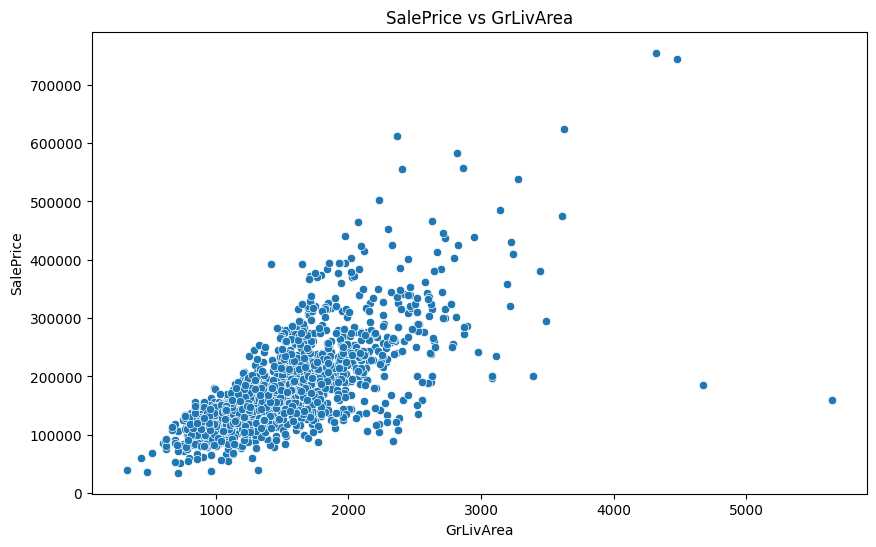

In [ ]:
# Scatter plot for numerical features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.title('SalePrice vs GrLivArea')
plt.show()



We can see at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.

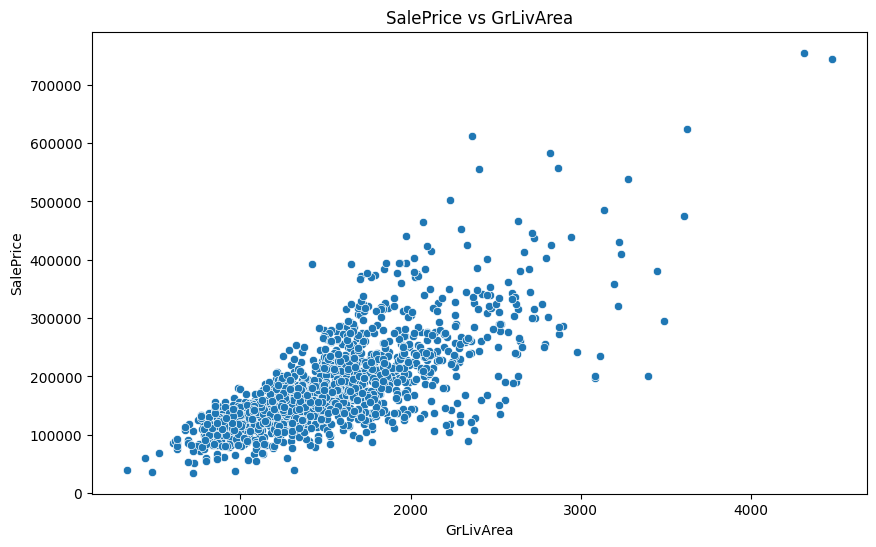

In [ ]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
# Scatter plot for numerical features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.title('SalePrice vs GrLivArea')
plt.show()



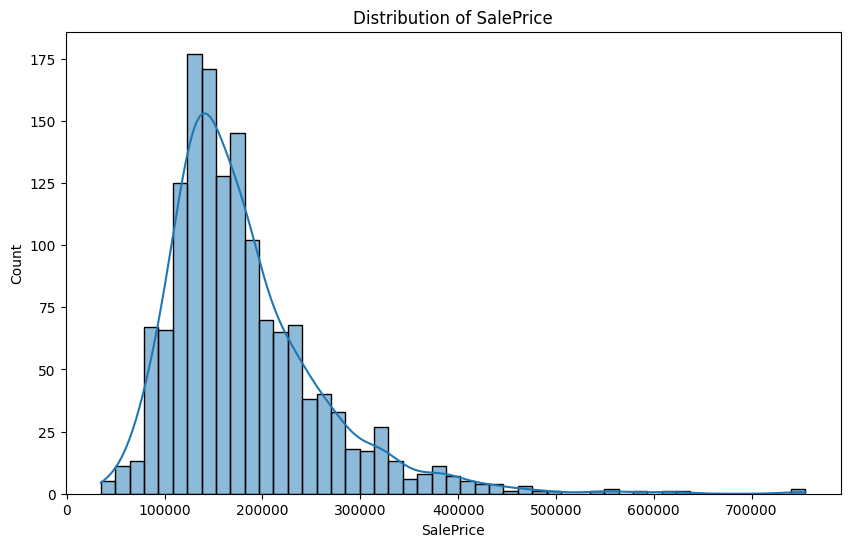

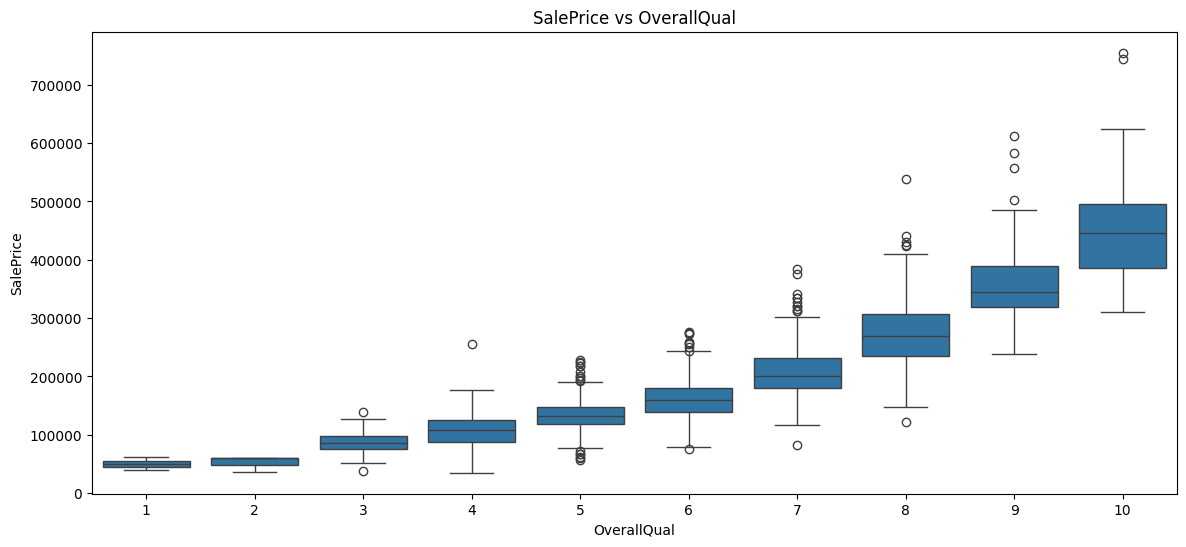

In [ ]:
# Filling missing data with median for numerical columns
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())

# Filling categorical columns with the mode
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
# Distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

# Boxplot for categorical variables
plt.figure(figsize=(14, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.title('SalePrice vs OverallQual')
plt.show()


In [ ]:
train["PoolQC"] = train["PoolQC"].fillna("None")
test["PoolQC"] = test["PoolQC"].fillna("None")


In [ ]:
train["MiscFeature"] = train["MiscFeature"].fillna("None")
test["MiscFeature"] = test["MiscFeature"].fillna("None")

In [ ]:
train["Alley"] = train["Alley"].fillna("None")
test["Alley"] = test["Alley"].fillna("None")

In [ ]:
train["Fence"] = train["Fence"].fillna("None")
test["Fence"] = test["Fence"].fillna("None")

In [ ]:
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")
test["FireplaceQu"] = test["FireplaceQu"].fillna("None")

In [ ]:
train["MSSubClass"] = train["MSSubClass"].fillna("None")
test["MSSubClass"] = test["MSSubClass"].fillna("None")

LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [ ]:
# train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
#     lambda x: x.fillna(x.median()))


In [ ]:
median_values = train.groupby("Neighborhood")["LotFrontage"].median()
median_values

,LotFrontage
Neighborhood,
Blmngtn,51.0
Blueste,24.0
BrDale,21.0
BrkSide,52.0
ClearCr,69.0
CollgCr,69.0
Crawfor,69.0
Edwards,67.0
Gilbert,69.0


In [ ]:
# Assuming `test` is your testing DataFrame

# Define a function to fill missing values based on median values
def fill_na_with_median(row, median_dict):
    return row if pd.notnull(row) else median_dict.get(row.name, None)


# Fill missing LotFrontage in the train data
train["LotFrontage"] = train.apply(
    lambda row: row["LotFrontage"] if pd.notnull(row["LotFrontage"])
    else median_values.get(row["Neighborhood"], None),
    axis=1
)

# Fill missing LotFrontage in the test data
test["LotFrontage"] = test.apply(
    lambda row: row["LotFrontage"] if pd.notnull(row["LotFrontage"])
    else median_values.get(row["Neighborhood"], None),
    axis=1
)


In [ ]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',\
            'BsmtFinType2'):
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

In [ ]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',\
            'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',\
            'MasVnrType', 'MasVnrArea', 'MSZoning'):
    test[col] = test[col].fillna(0)
    train[col] = train[col].fillna(0)


In [ ]:
train["Functional"] = train["Functional"].fillna("Typ")
test["Functional"] = test["Functional"].fillna("Typ")

In [ ]:
mode_electrical = train['Electrical'].mode()[0]
train["Electrical"] = train["Electrical"].fillna(mode_electrical)
test["Electrical"] = test["Electrical"].fillna(mode_electrical)

In [ ]:
mode_ = train['KitchenQual'].mode()[0]
train["KitchenQual"] = train["KitchenQual"].fillna(mode_)
test["KitchenQual"] = test["KitchenQual"].fillna(mode_)
mode_

'TA'

In [ ]:
mode_ = train['Exterior1st'].mode()[0]
train["Exterior1st"] = train["Exterior1st"].fillna(mode_)
test["Exterior1st"] = test["Exterior1st"].fillna(mode_)
mode_

'VinylSd'

In [ ]:
mode_ = train['SaleType'].mode()[0]
train["SaleType"] = train["SaleType"].fillna(mode_)
test["SaleType"] = test["SaleType"].fillna(mode_)
mode_

'WD'

In [ ]:
mode_ = train['Exterior2nd'].mode()[0]
train["Exterior2nd"] = train["Exterior2nd"].fillna(mode_)
test["Exterior2nd"] = test["Exterior2nd"].fillna(mode_)
mode_

'VinylSd'

In [ ]:

mode_ = train['Utilities'].mode()[0]
train["Utilities"] = train["Utilities"].fillna(mode_)
test["Utilities"] = test["Utilities"].fillna(mode_)
mode_

'AllPub'

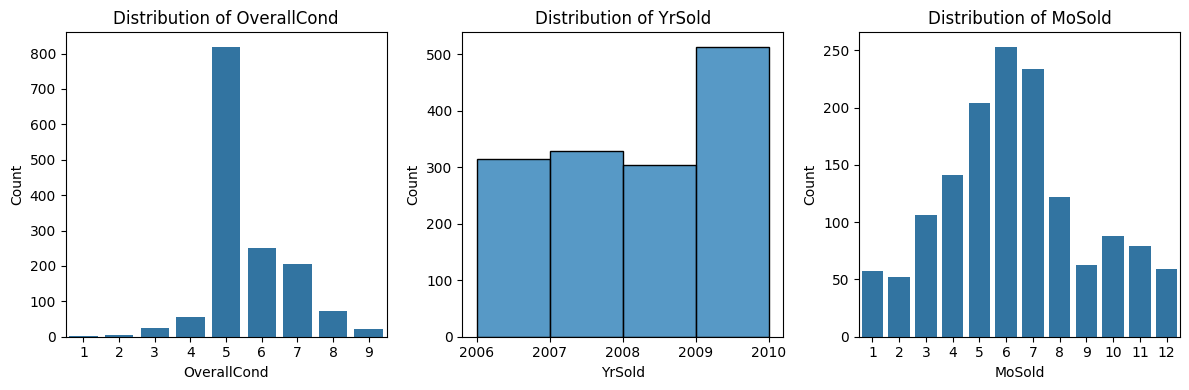

In [ ]:
#Transforming some numerical variables that are really categorical

# Plot for OverallCond
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.countplot(data=train, x='OverallCond')
plt.title('Distribution of OverallCond')
plt.xlabel('OverallCond')
plt.ylabel('Count')

# Plot for YrSold
plt.subplot(1, 3, 2)
sns.histplot(train['YrSold'], bins=range(train['YrSold'].min(), train['YrSold'].max() + 1), kde=False)
plt.title('Distribution of YrSold')
plt.xlabel('YrSold')
plt.ylabel('Count')

# Plot for MoSold
plt.subplot(1, 3, 3)
sns.countplot(data=train, x='MoSold')
plt.title('Distribution of MoSold')
plt.xlabel('MoSold')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
train.select_dtypes(include=['object']).columns.tolist()

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
#apply label encoder

from sklearn.preprocessing import LabelEncoder

# List of columns to encode
categorical_cols = [
    'FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
    'ExterQual', 'ExterCond', 'HeatingQC', 'PoolQC', 'KitchenQual',
    'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure',
    'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street',
    'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold',
    'MSZoning',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'GarageType',
 'MiscFeature',
 'SaleType',
 'SaleCondition'
]

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    try:
    # Combine train and test to ensure consistent encoding
      combined = pd.concat([train[col], test[col]], axis=0)
      le.fit(combined)

      # Transform and apply to both train and test
      train[col] = le.transform(train[col])
      test[col] = le.transform(test[col])
    except:
      print(col)

# Checking the changes
print(train.head())
print(test.head())


MSZoning
MasVnrType
   Id  MSSubClass MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1           5       RL         65.0     8450       1      1         3   
1   2           0       RL         80.0     9600       1      1         3   
2   3           5       RL         68.0    11250       1      1         0   
3   4           6       RL         60.0     9550       1      1         0   
4   5           5       RL         84.0    14260       1      1         0   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0            3          0  ...         0       3      4            1        0   
1            3          0  ...         0       3      4            1        0   
2            3          0  ...         0       3      4            1        0   
3            3          0  ...         0       3      4            1        0   
4            3          0  ...         0       3      4            1        0   

   MoSold  YrSold  SaleType  S

In [ ]:
#adding total area
# Adding total sqfootage feature
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']


Skew in numerical features: 

                   Skew
Utilities     38.144471
MiscVal       24.434913
PoolArea      15.932532
Condition2    13.676313
LotArea       12.560986
3SsnPorch     10.286510
Heating        9.838030
LowQualFinSF   8.995688
RoofMatl       8.122579
MiscFeature    5.007791


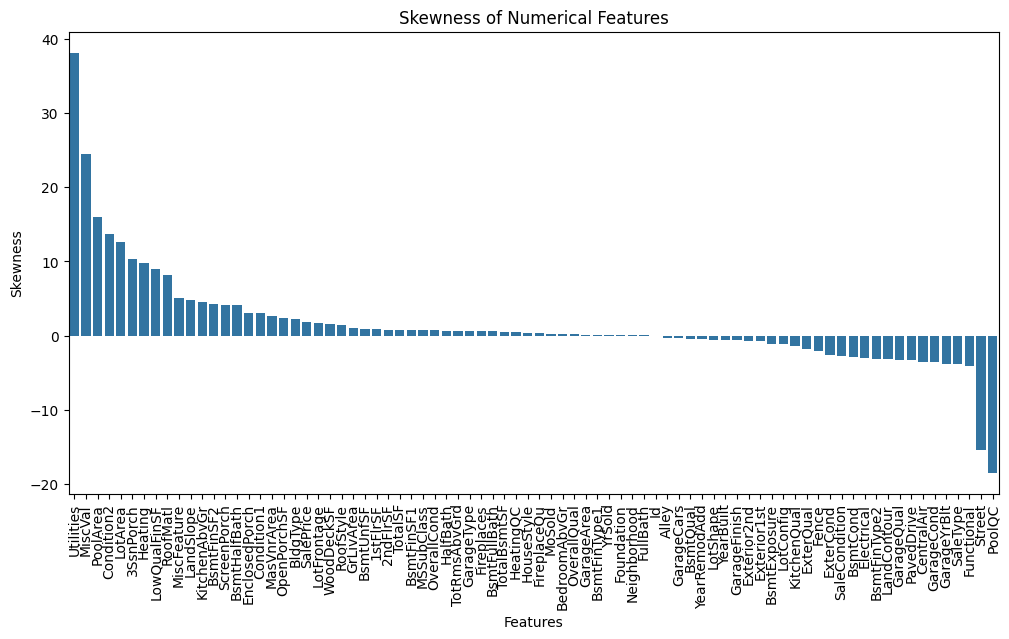

In [ ]:

from scipy.stats import skew

# Identify numerical features
numeric_feats = train.select_dtypes(include=[np.number]).columns

# Calculate skewness for numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Create a DataFrame for skewness
skewness = pd.DataFrame({'Skew': skewed_feats})

# Print skewness of the top features
print("\nSkew in numerical features: \n")
print(skewness.head(10))

# Plot the skewness of numerical features
plt.figure(figsize=(12, 6))
sns.barplot(x=skewness.index, y='Skew', data=skewness)
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.title('Skewness of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
train_features = train.drop(['Id', 'SalePrice', 'MSZoning', 'MasVnrType'], axis=1)

# Define your target variable and feature matrix
train_train = train_features
y = train['SalePrice']

test_test = test.drop(['Id', 'MSZoning', 'MasVnrType'], axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_train, y)


LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(test_test)

In [ ]:
pd.DataFrame(
    {"Id": test.Id,
     "SalePrice": y_pred
     }
).to_csv("submission.csv", index=False)

In [ ]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,1461,0,RH,80.0,11622,1,1,3,3,0,...,0,3,2,1,0,5,4,8,4,1778.0
1,1462,0,RL,81.0,14267,1,1,0,3,0,...,0,3,4,0,12500,5,4,8,4,2658.0
2,1463,5,RL,74.0,13830,1,1,0,3,0,...,0,3,2,1,0,2,4,8,4,2557.0
3,1464,5,RL,78.0,9978,1,1,0,3,0,...,0,3,4,1,0,5,4,8,4,2530.0
4,1465,11,RL,43.0,5005,1,1,0,1,0,...,0,3,4,1,0,0,4,8,4,2560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,13,RM,21.0,1936,1,1,3,3,0,...,0,3,4,1,0,5,0,8,4,1638.0
1455,2916,13,RM,21.0,1894,1,1,3,3,0,...,0,3,4,1,0,3,0,8,0,1638.0
1456,2917,0,RL,160.0,20000,1,1,3,3,0,...,0,3,4,1,0,8,0,8,0,2448.0
1457,2918,9,RL,62.0,10441,1,1,3,3,0,...,0,3,2,3,700,6,0,8,4,1882.0


In [ ]:
# Optional: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_train)
X_test_scaled = scaler.transform(test_test)

model = LinearRegression()
model.fit(X_train_scaled, y)
# Make predictions
y_pred = model.predict(X_test_scaled)

pd.DataFrame(
    {"Id": test.Id,
     "SalePrice": y_pred
     }
).to_csv("submission.csv", index=False)

In [ ]:
test_test

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,0,80.0,11622,1,1,3,3,0,4,0,...,0,3,2,1,0,5,4,8,4,1778.0
1,0,81.0,14267,1,1,0,3,0,0,0,...,0,3,4,0,12500,5,4,8,4,2658.0
2,5,74.0,13830,1,1,0,3,0,4,0,...,0,3,2,1,0,2,4,8,4,2557.0
3,5,78.0,9978,1,1,0,3,0,4,0,...,0,3,4,1,0,5,4,8,4,2530.0
4,11,43.0,5005,1,1,0,1,0,4,0,...,0,3,4,1,0,0,4,8,4,2560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,13,21.0,1936,1,1,3,3,0,4,0,...,0,3,4,1,0,5,0,8,4,1638.0
1455,13,21.0,1894,1,1,3,3,0,4,0,...,0,3,4,1,0,3,0,8,0,1638.0
1456,0,160.0,20000,1,1,3,3,0,4,0,...,0,3,4,1,0,8,0,8,0,2448.0
1457,9,62.0,10441,1,1,3,3,0,4,0,...,0,3,2,3,700,6,0,8,4,1882.0


In [ ]:

import xgboost as xgb



model =  xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', n_estimators=1000, learning_rate=0.01)
model.fit(X_train_scaled, y)
# Make predictions
y_pred = model.predict(X_test_scaled)

pd.DataFrame(
    {"Id": test.Id,
     "SalePrice": y_pred
     }
).to_csv("submission.csv", index=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
model =  RandomForestRegressor()
model.fit(X_train_scaled, y)
# Make predictions
y_pred = model.predict(X_test_scaled)

pd.DataFrame(
    {"Id": test.Id,
     "SalePrice": y_pred
     }
).to_csv("submission.csv", index=False)

In [ ]:
model =  GradientBoostingRegressor()
model.fit(X_train_scaled, y)
# Make predictions
y_pred = model.predict(X_test_scaled)

pd.DataFrame(
    {"Id": test.Id,
     "SalePrice": y_pred
     }
).to_csv("submission.csv", index=False)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

model =  SVR()
model.fit(X_train_scaled, y)
# Make predictions
y_pred = model.predict(X_test_scaled)

pd.DataFrame(
    {"Id": test.Id,
     "SalePrice": y_pred
     }
).to_csv("submission.csv", index=False)

In [ ]:
model =  DecisionTreeRegressor()
model.fit(X_train_scaled, y)
# Make predictions
y_pred = model.predict(X_test_scaled)

pd.DataFrame(
    {"Id": test.Id,
     "SalePrice": y_pred
     }
).to_csv("submission.csv", index=False)